# Deploying a Model with Gradio

In [14]:
# load dependencies
import fastbook
fastbook.setup_book()

In [15]:
from fastbook import *
from fastai.vision.widgets import *

## Gathering Data

We can use the duck duck go api to search images -- this allows us to search without an API key.

In [25]:
# preview function
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [29]:
# search for images using a key
ims = search_images_ddg('largemouth bass')
len(images)

200

In [33]:
# save image to folder
dest = 'images/largemouth.jpg'
download_url(ims[0], dest, show_progress=False)

Path('images/largemouth.jpg')

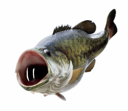

In [35]:
# preview image
im = Image.open(dest)
im.to_thumb(128,128)

In [36]:
# identify labels that we will want to classify fish into
bass_types = 'largemouth', 'smallmouth', 'peacock'
path = Path('bass-types')

In [37]:
# loop through bass types and download images
if not path.exists():
    path.mkdir()
    for bass_type in bass_types:
        dest = (path/bass_type)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{bass_type} bass')
        download_images(dest, urls=results)

In [40]:
# preview folder of image files
im_files = get_image_files(path)
im_files

(#541) [Path('bass-types/largemouth/c095e598-5c1a-4ddb-ae43-d9c0a2883b6e.gif'),Path('bass-types/largemouth/2e0710b2-16f6-44d8-8bd8-043bc634611b.jpg'),Path('bass-types/largemouth/d432d70f-2065-4f57-80d7-975a4a6992a0.jpg'),Path('bass-types/largemouth/a24c37ac-fea7-4fc0-bb4b-c5c1266b1bd2.jpg'),Path('bass-types/largemouth/b13106db-d1ba-42fe-b4a2-e860bda68c93.jpg'),Path('bass-types/largemouth/c27ccdbb-7b95-4258-ac6c-528f51659940.JPG'),Path('bass-types/largemouth/c22f5563-eeed-4c73-9bbe-ddd622580568.jpg'),Path('bass-types/largemouth/e93017e4-4a01-48c9-9269-3529842a7dbe.jpg'),Path('bass-types/largemouth/347582ab-5337-4813-bf02-fd9b527acfd4.jpg'),Path('bass-types/largemouth/a931ac70-a8a1-45ec-b338-9027abedd233.jpg')...]

In [41]:
# check for corrupt files
corrupt_ims = verify_images(im_files)
corrupt_ims

(#13) [Path('bass-types/largemouth/4924b2f7-6628-433a-9604-b73f31cbb8f0.jpg'),Path('bass-types/largemouth/b7a94c86-5937-442b-a19e-7d9b55f9fa9b.jpg'),Path('bass-types/largemouth/c50ed55a-07d3-491d-b6e9-ffcde2e8fe0d.jpg'),Path('bass-types/largemouth/72de0f55-1cf7-4022-822d-2368a465c844.jpg'),Path('bass-types/peacock/bd4255ed-75a9-416f-82dc-10d3806c811d.jpg'),Path('bass-types/peacock/8d80f952-0ae8-415f-b484-bac3d3c585bc.jpg'),Path('bass-types/peacock/40eff741-191e-49ed-a43f-e166f898e0b8.jpg'),Path('bass-types/peacock/fd14cbf8-e278-4742-a300-01d481ebd537.jpg'),Path('bass-types/smallmouth/e3b187a3-5fac-4602-9bd6-e52204628b57.jpg'),Path('bass-types/smallmouth/8f967a80-a80a-4135-ba66-f3ea69081d83.jpg')...]

In [42]:
# see how many failed
len(corrupt_ims)

13

In [43]:
# remove failed images
corrupt_ims.map(Path.unlink);